In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('car data.csv')
df.shape

(301, 9)

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
def unique(df,col):
    print(df[col].value_counts())

In [6]:
unique(df,"Owner")
unique(df,"Transmission")
unique(df,'Seller_Type')
unique(df,'Fuel_Type')

0    290
1     10
3      1
Name: Owner, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


We want to check the Age of the Car

In [8]:
df['Year_old']=2022-df['Year']

In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year_old
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [10]:
df.drop(columns=['Car_Name','Year'],inplace=True)

In [11]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Year_old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [12]:
df=pd.get_dummies(df,drop_first=True)

In [13]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Year_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

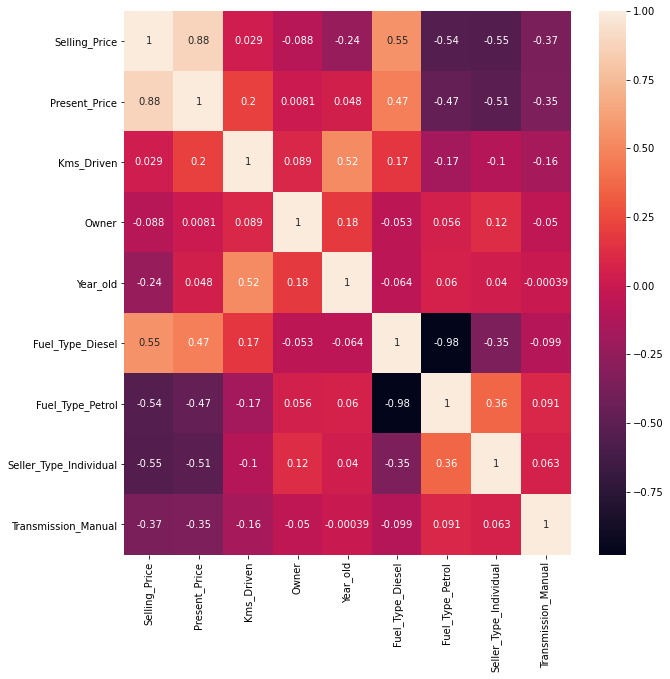

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [16]:
x=df.iloc[:,1:]
y=df.iloc[:,0]#All the rows and 0Th column

In [17]:
x.head()

,Present_Price,Kms_Driven,Owner,Year_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [18]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [19]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [20]:
imp_df=pd.DataFrame(model.feature_importances_,index=x.columns)

In [21]:
imp_df

,0
Present_Price,0.387127
Kms_Driven,0.042032
Owner,0.001674
Year_old,0.075130
Fuel_Type_Diesel,0.226765
Fuel_Type_Petrol,0.007481
Seller_Type_Individual,0.130526
Transmission_Manual,0.129265


<AxesSubplot:>

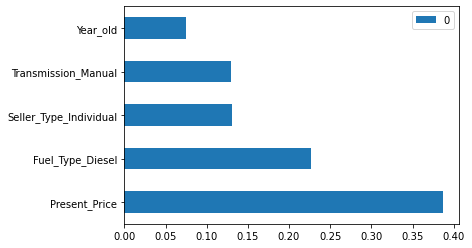

In [22]:
imp_df.nlargest(5,columns=0).plot(kind='barh')

In [23]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [25]:
md=LinearRegression()
md.fit(x_train,y_train)

LinearRegression()

In [26]:
y_pred=md.predict(x_test)

In [27]:
y_pred

array([ 8.12947941e+00, -1.73665242e+00,  1.16081313e+01,  8.18706637e-02,
        2.19184340e+00, -3.14471006e+00,  8.92497517e+00, -3.65306348e+00,
        6.37309543e+00,  4.67947623e+00,  4.81996944e+01,  1.79812513e+01,
        6.80343715e+00,  1.37931596e+00,  9.46650008e+00,  8.51364017e+00,
        2.44437377e+00,  1.46896897e+01,  6.34309991e+00,  5.27652323e-01,
        2.00428721e+00,  1.86149821e+00,  4.06946790e+00,  6.26943461e+00,
        5.66626097e+00,  8.18342057e+00,  6.58304420e+00,  7.41965441e+00,
        9.88515995e+00,  4.23509673e+00,  5.71361889e+00, -1.31574968e+00,
        5.64687816e+00,  5.83707619e+00, -8.18075828e-01,  3.84865627e+00,
        7.23473557e+00,  1.71339094e+01,  3.03747618e+00,  2.32294140e-02,
        1.90916649e+00,  5.33673602e+00,  8.62038705e+00,  1.75054409e+00,
        1.57826014e+00,  1.36149276e+00,  7.48679057e+00,  2.48847512e+00,
        5.12025827e+00,  3.25201994e+00,  5.69261979e+00,  9.06493240e-01,
        4.59142523e+00,  

C:\Users\debap\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

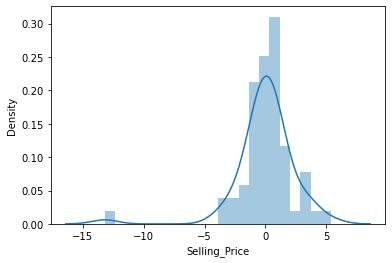

In [28]:
sns.distplot(y_test-y_pred)

Normally Distribution between predictions and x_test

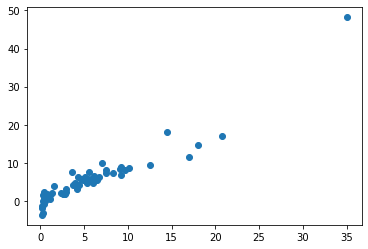

In [29]:
plt.scatter(y_test,y_pred)

Linearly plotting so model is pretty much good

In [30]:
md.score(x_test,y_test)

0.8309021759960671

In [31]:
import pickle
file=open('random_forest_regression_model.pkl','wb')
pickle.dump(md,file)